# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [133]:
# Cargar todas las librerías
import pandas as pd #trabajar con tablas de datos
import numpy as np #operaciones matematicas y numericas
from matplotlib import pyplot as plt #generar visualizaciones (graficos)
import scipy.stats as st #pruebas de hipotesis
from datetime import datetime

## Cargar datos

In [134]:
# Carga los archivos de datos en diferentes DataFrames
df_users=pd.read_csv('/datasets/megaline_users.csv', sep=",")
df_calls=pd.read_csv('/datasets/megaline_calls.csv',  sep=",")
df_messages=pd.read_csv('/datasets/megaline_messages.csv',  sep=",")
df_internet=pd.read_csv('/datasets/megaline_internet.csv',  sep=",")
df_plans=pd.read_csv('/datasets/megaline_plans.csv',  sep=",")


## Preparar los datos

## Tarifas

In [135]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [136]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El DataFrame solo muestra dos filas y 8 columnas donde esta el detalle de lo que contiene cada plan, no se observa datos ausente o duplicados, sin embargo en la columna 2 que corresponde a mb_per_month_included presenta el valor por megabytes que en el caso de consumo de datos debe corresponder a gigabytes ya que asi es el manejo en el mercado para el caso de los celulares por lo cual se debe adicionar una nueva columna con gigabytes, adicionalmente podriamos adicionar por plan el valor de los costos de minutos, mensajes y gigas que costarian fuera de los planes para poder comparar el ahorro aproximado que se tiene por plan y valor total ahorrado.

## Corregir datos

In [137]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Enriquecer los datos

In [138]:
#Costo por gigabytes fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_gigas'] = df_plans['gb_per_month_included'] * (df_plans['usd_per_gb'])
#Costo por minuto fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_minuto'] = df_plans['minutes_included'] * df_plans['usd_per_minute']
#Costo por mensaje fuera del plan por la cantidad que esta incluido en el plan
df_plans['costo_mensaje'] = df_plans['messages_included'] * df_plans['usd_per_message']
#Total de costo de paquete fuera del plan
df_plans['total_costo'] = (df_plans['costo_gigas']) + df_plans['costo_minuto'] + df_plans['costo_mensaje']
#Ahorro por plan
df_plans['ahorro_plan'] = df_plans['total_costo'] - df_plans['usd_monthly_pay']
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,costo_gigas,costo_minuto,costo_mensaje,total_costo,ahorro_plan
0,50,15360,500,20,10,0.03,0.03,surf,15.0,150.0,15.0,1.5,166.5,146.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,210.0,30.0,10.0,250.0,180.0


## Usuarios/as

In [139]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [140]:
# Imprime una muestra de datos para usuarios
df_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
168,1168,Shay,Weaver,58,"Milwaukee-Waukesha, WI MSA",2018-12-13,surf,NaN
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaN
30,1030,Chase,Kane,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-14,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN
420,1420,Season,Hardy,27,"San Francisco-Oakland-Berkeley, CA MSA",2018-02-22,ultimate,NaN
299,1299,Keitha,Harrison,64,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN


Del DataFrame se oberva que la fecha esta en otro formato y se debe cambiar a dd/mm/aa, adicionalmente podemos incluir una columna donde podamos validar que usuarios estan activos y cuales inactivos, la antiguedad del usuario, clasificar por un rango de edades de los usuarios, separar por ciudad y estado.

### Corregir los datos

In [141]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], dayfirst=True, errors='coerce')
df_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaN
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,NaN
136,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,NaN
326,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,NaN
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaN
57,1057,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,ultimate,NaN
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN
204,1204,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN


### Enriquecer los datos

In [142]:
#Antiguedad de usuario en años
hoy = pd.to_datetime('today')
df_users['antiguedad_dias'] = (hoy - df_users['reg_date']).dt.days
df_users['antiguedad_anos'] = df_users['antiguedad_dias'] // 365
#Cambiar formato columna 'reg_date' a str
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
#Obtener la ciudad y estado por separado.
df_users['ciudad_sola'] = df_users['city'].str.split(',').str[0]
df_users['estado'] = df_users['city'].str.extract(r', (\w{2})')
#Agrupar edad por rangos
df_users['grupo_edad'] = pd.cut(
    df_users['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['18-25', '26-35', '36-50', '51-65', '66+'],
    right=True)
#Status de usuario
df_users['status'] = df_users['churn_date'].isna()
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,antiguedad_dias,antiguedad_anos,ciudad_sola,estado,grupo_edad,status
447,1447,Ramon,Hester,62,"Orlando-Kissimmee-Sanford, FL MSA",01/05/2018,surf,NaN,2632,7,Orlando-Kissimmee-Sanford,FL,51-65,True
231,1231,Gaylord,Witt,57,"San Jose-Sunnyvale-Santa Clara, CA MSA",19/01/2018,ultimate,NaN,2734,7,San Jose-Sunnyvale-Santa Clara,CA,51-65,True
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",09/06/2018,ultimate,NaN,2593,7,Philadelphia-Camden-Wilmington,PA,36-50,True
266,1266,Dorie,Chandler,62,"New York-Newark-Jersey City, NY-NJ-PA MSA",13/12/2018,surf,NaN,2406,6,New York-Newark-Jersey City,NY,51-65,True
161,1161,Florance,Estrada,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",27/11/2018,ultimate,NaN,2422,6,New York-Newark-Jersey City,NY,51-65,True
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",02/02/2018,surf,NaN,2720,7,New York-Newark-Jersey City,NY,18-25,True
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",07/10/2018,surf,NaN,2473,6,Los Angeles-Long Beach-Anaheim,CA,51-65,True
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",04/06/2018,surf,2018-11-11,2598,7,Miami-Fort Lauderdale-West Palm Beach,FL,18-25,False
313,1313,Antoine,Baker,49,"San Francisco-Oakland-Berkeley, CA MSA",24/05/2018,surf,NaN,2609,7,San Francisco-Oakland-Berkeley,CA,36-50,True
391,1391,Errol,Cooke,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",11/09/2018,ultimate,NaN,2499,6,New York-Newark-Jersey City,NY,51-65,True


## Llamadas

In [143]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [144]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)

,id,user_id,call_date,duration
112651,1397_255,1397,2018-09-18,3.34
69946,1250_176,1250,2018-10-23,7.87
95144,1337_70,1337,2018-12-03,3.83
33970,1126_899,1126,2018-08-29,0.00
117567,1411_170,1411,2018-10-28,3.69
113522,1399_145,1399,2018-12-12,5.32
45076,1163_135,1163,2018-10-31,15.22
126798,1451_198,1451,2018-11-23,0.00
29517,1111_160,1111,2018-12-12,11.38
51733,1185_771,1185,2018-05-19,0.00


Para el Dataframe de Llamadas se debe cambiar el formato de la fecha de llamada en dd/mm/aa,  y que este en datetime64, podemos incluir la columna del total de minutos mensuales para comparar con los minutos que incluye el plan y validar si supera el consumo de acuerdo al plan contratado y cuantos usuarios superar el plan mensualmente.

### Corregir los datos

In [145]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], dayfirst=True, errors='coerce')
df_calls.sample(20)

,id,user_id,call_date,duration
8306,1039_246,1039,2018-10-12,0.00
129176,1465_468,1465,2018-08-13,20.71
47988,1173_411,1173,2018-12-09,6.52
49295,1178_374,1178,2018-11-02,1.48
47993,1173_422,1173,2018-11-17,11.13
41893,1153_783,1153,2018-11-15,4.73
80486,1291_86,1291,2018-11-11,10.23
113250,1398_10,1398,2018-12-29,9.87
75316,1267_38,1267,2018-12-12,0.00
10167,1046_33,1046,2018-10-24,5.08


### Enriquecer los datos

In [146]:
#Crear columna año-mes para agrupar
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M').astype(str)
#Agrupar total minutos por mes y usuario
df_minutos_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    total_minutos_mes=('duration', 'sum')
).reset_index()
#Agregar columna del plan de usuario
df_minutos_mes = df_minutos_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar los minutos incluidos del plan
df_minutos_mes = df_minutos_mes.merge(
    df_plans[['plan_name', 'minutes_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_minutos_mes = df_minutos_mes.drop(columns=['plan_name'])
#Comparar el consumo del mes con los minutos consumidos por mes
df_minutos_mes['supero_plan'] = df_minutos_mes['total_minutos_mes'] > df_minutos_mes['minutes_included']
df_minutos_mes['total_minutos_mes'] = df_minutos_mes['total_minutos_mes'].round(2)
#Agregar columnas al DataFrame df_calls
df_calls = df_calls.merge(
    df_minutos_mes[['user_id', 'year_month', 'total_minutos_mes', 'plan', 'minutes_included', 'supero_plan']],
    on=['user_id', 'year_month'],
    how='left'
)
print(df_calls['supero_plan'].value_counts())

False    91645
True     46090
Name: supero_plan, dtype: int64


## Mensajes

In [147]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [148]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(20)

,id,user_id,message_date
36697,1246_1,1246,2018-08-02
8131,1061_137,1061,2018-09-25
6872,1057_196,1057,2018-12-09
63942,1408_67,1408,2018-09-12
32668,1203_313,1203,2018-12-01
37651,1249_161,1249,2018-10-18
32925,1205_0,1205,2018-12-27
5233,1051_645,1051,2018-12-29
65983,1431_22,1431,2018-11-25
38050,1251_102,1251,2018-04-23


En el DataFrame df_messages se debe corregir la columna message_date que este en Datetime64, podemos incluir una columna de año y mes para poder posteriormente totalizar el total de mensajes usados en el mes y compararlos con la cantidad contratado con el plan y validar si superaron la cantidad del plan.

### Corregir los datos

In [149]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], dayfirst=True, errors='coerce')
df_messages.sample(20)

,id,user_id,message_date
21518,1132_897,1132,2018-08-23
51361,1334_79,1334,2018-12-09
31425,1195_292,1195,2018-09-24
10012,1076_50,1076,2018-08-14
17119,1113_219,1113,2018-08-23
42752,1280_282,1280,2018-08-22
16408,1110_299,1110,2018-09-25
22144,1132_1772,1132,2018-06-13
6588,1056_98,1056,2018-10-23
72457,1470_85,1470,2018-09-19


### Enriquecer los datos

In [150]:
#Crear columna año-mes para agrupar
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M').astype(str)
#Contar mensajes por mes y usuario
df_mensajes_mes = df_messages.groupby(['user_id', 'year_month']).agg(
    total_mensajes_mes=('id', 'count')
).reset_index()
#Agregar columna del plan de usuario
df_mensajes_mes = df_mensajes_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar total mensajes incluidos del plan
df_mensajes_mes = df_mensajes_mes.merge(
    df_plans[['plan_name', 'messages_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_mensajes_mes = df_mensajes_mes.drop(columns=['plan_name'])
#Comparar el consumo del mes con los mensajes consumidos por mes
df_mensajes_mes['supero_plan'] = df_mensajes_mes['total_mensajes_mes'] > df_mensajes_mes['messages_included']
df_mensajes_mes['total_mensajes_mes'] = df_mensajes_mes['total_mensajes_mes'].round(2)
#Agregar columnas al DataFrame df_calls
df_messages = df_messages.merge(
    df_mensajes_mes[['user_id', 'year_month', 'total_mensajes_mes', 'plan', 'messages_included', 'supero_plan']],
    on=['user_id', 'year_month'],
    how='left'
)
print(df_messages['supero_plan'].value_counts())
df_messages.sample(20)

False    48020
True     28031
Name: supero_plan, dtype: int64


,id,user_id,message_date,year_month,total_mensajes_mes,plan,messages_included,supero_plan
20924,1132_63,1132,2018-06-03,2018-06,143,ultimate,1000,False
68868,1446_30,1446,2018-11-28,2018-11,21,surf,50,False
26760,1164_10,1164,2018-08-08,2018-08,21,ultimate,1000,False
67303,1435_341,1435,2018-11-13,2018-11,125,ultimate,1000,False
2720,1028_647,1028,2018-03-06,2018-03,66,ultimate,1000,False
61994,1387_68,1387,2018-09-09,2018-09,18,surf,50,False
5707,1054_73,1054,2018-09-08,2018-09,30,surf,50,False
53351,1339_485,1339,2018-07-05,2018-07,78,surf,50,True
25888,1155_273,1155,2018-11-23,2018-11,28,ultimate,1000,False
60116,1381_229,1381,2018-10-16,2018-10,224,surf,50,True


## Internet

In [151]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [152]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(20)

,id,user_id,session_date,mb_used
1151,1007_135,1007,2018-10-23,520.49
27240,1126_345,1126,2018-09-12,615.97
18312,1081_393,1081,2018-05-04,2.77
95792,1446_389,1446,2018-11-18,0.00
50040,1223_239,1223,2018-09-09,572.92
47311,1211_188,1211,2018-08-23,461.19
71420,1333_217,1333,2018-11-27,93.68
100059,1474_260,1474,2018-11-28,580.54
86285,1400_422,1400,2018-10-28,406.58
97277,1458_336,1458,2018-11-24,816.35


En el DataFrame df_internet se debe corregir la columna session_date que este en Datetime64, convertir la columna mb_used en gigabytes y podemos incluir una columna de año y mes para poder posteriormente totalizar los gigabytes  usados en el mes y compararlos con la cantidad contratado con el plan y validar si superaron la cantidad del plan.

### Corregir los datos

In [153]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], dayfirst=True, errors='coerce')
df_internet.sample(10)

,id,user_id,session_date,mb_used
37749,1171_120,1171,2018-10-12,729.00
32783,1147_430,1147,2018-06-16,288.42
69377,1324_92,1324,2018-10-03,1004.38
53346,1240_318,1240,2018-07-14,648.22
1963,1010_123,1010,2018-11-01,59.07
86361,1400_498,1400,2018-12-06,105.41
62792,1289_150,1289,2018-11-26,505.00
12063,1059_168,1059,2018-11-19,461.97
76840,1359_533,1359,2018-07-31,722.91
10531,1054_64,1054,2018-09-23,0.00


### Enriquecer los datos

In [154]:
#Convertir columna mb en gb
df_internet['gb_used'] = df_internet['mb_used'] / 1024
#Crear columna año-mes para agrupar
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M').astype(str)
#Contar gb por mes y usuario
df_gb_mes = df_internet.groupby(['user_id', 'year_month']).agg(
    total_gb_mes=('gb_used', 'sum')
).reset_index()
#Agregar columna del plan de usuario
df_gb_mes = df_gb_mes.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
#Agregar columna MB incluidos del plan
df_gb_mes = df_gb_mes.merge(
    df_plans[['plan_name', 'mb_per_month_included']],
    left_on='plan',
    right_on='plan_name',
    how='left'
)
#Convertir MB incluidos a GB incluidos
df_gb_mes['gb_included'] = df_gb_mes['mb_per_month_included'] / 1024
#Eliminar columnas innecesarias
df_gb_mes = df_gb_mes.drop(columns=['plan_name', 'mb_per_month_included'])
#Redondear total de GB usados por mes a 2 decimales
df_gb_mes['total_gb_mes'] = df_gb_mes['total_gb_mes'].round(2)
#Comparar el consumo del mes con los datos consumidos por mes
df_gb_mes['supero_plan_gb'] = df_gb_mes['total_gb_mes'] > df_gb_mes['gb_included']
print(df_gb_mes['supero_plan_gb'].value_counts())
df_gb_mes.sample(20)

False    1325
True      952
Name: supero_plan_gb, dtype: int64


,user_id,year_month,total_gb_mes,plan,gb_included,supero_plan_gb
753,1157,2018-07,6.30,surf,15.0,False
2053,1444,2018-08,11.70,surf,15.0,False
217,1053,2018-07,0.84,surf,15.0,False
951,1197,2018-12,17.05,surf,15.0,True
914,1191,2018-07,17.48,ultimate,30.0,False
1821,1392,2018-11,18.68,surf,15.0,True
1733,1374,2018-04,2.33,surf,15.0,False
1351,1291,2018-10,20.77,surf,15.0,True
1722,1370,2018-10,17.37,ultimate,30.0,False
342,1073,2018-07,14.97,surf,15.0,False


## Estudiar las condiciones de las tarifas

In [155]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,costo_gigas,costo_minuto,costo_mensaje,total_costo,ahorro_plan
0,50,15360,500,20,10,0.03,0.03,surf,15.0,150.0,15.0,1.5,166.5,146.5
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,210.0,30.0,10.0,250.0,180.0


## Agregar datos por usuario

In [156]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_llamadas_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    numero_llamadas_mes=('duration', 'count')
).reset_index()
df_llamadas_mes.sample(5)

,user_id,year_month,numero_llamadas_mes
763,1163,2018-12,76
948,1203,2018-03,6
1664,1365,2018-07,155
1120,1245,2018-11,29
2092,1461,2018-11,39


In [157]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_minutos_mes = df_calls.groupby(['user_id', 'year_month']).agg(
    total_minutos_mes=('duration', 'sum')
).reset_index()
df_minutos_mes.sample(5)

,user_id,year_month,total_minutos_mes
645,1140,2018-10,825.87
2162,1476,2018-11,388.76
2075,1458,2018-08,205.85
900,1192,2018-10,407.59
616,1133,2018-09,297.96


In [158]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_mensajes_mes = df_messages.groupby(['user_id', 'year_month']).agg(
    total_mensajes_mes=('id', 'count')
).reset_index()
df_mensajes_mes.sample(5)

,user_id,year_month,total_mensajes_mes
831,1222,2018-07,23
1289,1346,2018-10,57
1472,1394,2018-12,23
683,1184,2018-12,37
134,1046,2018-10,27


In [159]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_gb_mes = df_internet.groupby(['user_id', 'year_month']).agg(
    total_gb_mes=('gb_used', 'sum')
).reset_index().round(2)
df_gb_mes.sample(5)

,user_id,year_month,total_gb_mes
38,1010,2018-04,19.26
1327,1284,2018-10,30.95
1311,1280,2018-08,10.64
616,1131,2018-07,16.18
2229,1491,2018-05,6.31


In [160]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_total = df_gb_mes.merge(
    df_llamadas_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.merge(
    df_minutos_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.merge(
    df_mensajes_mes,
    on=['user_id', 'year_month'],
    how='left'
)
df_total = df_total.fillna(0)
df_total.sample(5)

,user_id,year_month,total_gb_mes,numero_llamadas_mes,total_minutos_mes,total_mensajes_mes
1344,1290,2018-12,4.64,8.0,47.38,19.0
2263,1498,2018-03,19.28,37.0,247.72,0.0
1396,1302,2018-11,22.45,70.0,449.45,68.0
514,1109,2018-11,10.76,68.0,441.31,0.0
934,1195,2018-09,4.12,23.0,133.92,25.0


In [161]:
# Verificar los contadores en int
cols_int = ['numero_llamadas_mes', 'total_minutos_mes', 'total_mensajes_mes']
df_total[cols_int] = df_total[cols_int].fillna(0).astype(int)
# Incluir la columna plan 
df_total = df_total.merge(
    df_users[['user_id', 'plan']],
    on='user_id',
    how='left'
)
#Agregar la informacion de la tarifa
df_total = df_total.merge(
    df_plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)
df_total = df_total.drop(columns=['plan_name'])
df_total.sample(5)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2277 non-null   int64  
 1   year_month             2277 non-null   object 
 2   total_gb_mes           2277 non-null   float64
 3   numero_llamadas_mes    2277 non-null   int64  
 4   total_minutos_mes      2277 non-null   int64  
 5   total_mensajes_mes     2277 non-null   int64  
 6   plan                   2277 non-null   object 
 7   messages_included      2277 non-null   int64  
 8   mb_per_month_included  2277 non-null   int64  
 9   minutes_included       2277 non-null   int64  
 10  usd_monthly_pay        2277 non-null   int64  
 11  usd_per_gb             2277 non-null   int64  
 12  usd_per_message        2277 non-null   float64
 13  usd_per_minute         2277 non-null   float64
 14  gb_per_month_included  2277 non-null   float64
 15  cost

In [162]:
# Calcula el ingreso mensual para cada usuario
#Excedente de gigas (GB)
df_total['exceso_gb'] = (df_total['total_gb_mes'] - df_total['gb_per_month_included']).clip(lower=0)
#Excedente de minutos
df_total['exceso_minutos'] = (df_total['total_minutos_mes'] - df_total['minutes_included']).clip(lower=0)
#Excedente de mensajes
df_total['exceso_mensajes'] = (df_total['total_mensajes_mes'] - df_total['messages_included']).clip(lower=0)
#Costos por excedentes
df_total['costo_exceso_gb'] = df_total['exceso_gb'] * df_total['usd_per_gb']
df_total['costo_exceso_minutos'] = df_total['exceso_minutos'] * df_total['usd_per_minute']
df_total['costo_exceso_mensajes'] = df_total['exceso_mensajes'] * df_total['usd_per_message']
#Ingreso mensual final (tarifa fija + excedentes)
df_total['ingreso_total_mes'] = (
    df_total['usd_monthly_pay'] +
    df_total['costo_exceso_gb'] +
    df_total['costo_exceso_minutos'] +
    df_total['costo_exceso_mensajes']
).round(2)
#Resultado
df_ingresos = df_total[['user_id', 'year_month', 'plan', 'ingreso_total_mes']].copy()
print(df_ingresos.head())

   user_id year_month      plan  ingreso_total_mes
0     1000    2018-12  ultimate              70.00
1     1001    2018-08      surf              20.00
2     1001    2018-09      surf              20.00
3     1001    2018-10      surf              88.19
4     1001    2018-11      surf              50.70


## Estudia el comportamiento de usuario

### Llamadas

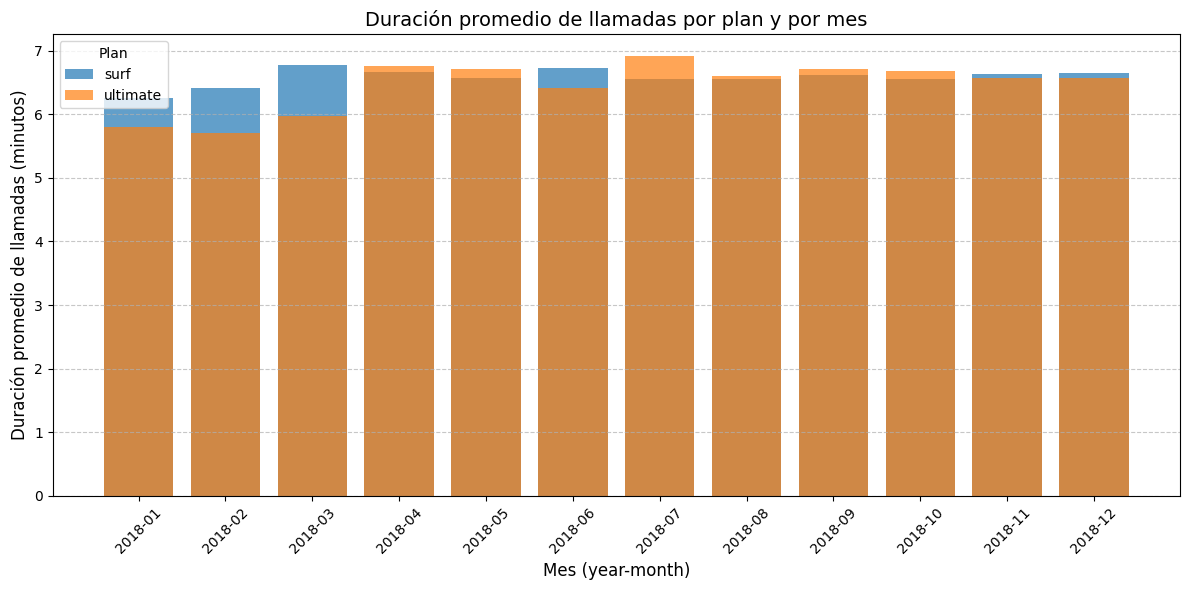

In [163]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_total['duracion_promedio_llamada'] = df_total['total_minutos_mes'] / df_total['numero_llamadas_mes']
df_total['duracion_promedio_llamada'] = df_total['duracion_promedio_llamada'].fillna(0)
#Agrupar por plan y year_month
df_promedio = df_total.groupby(['plan', 'year_month'])['duracion_promedio_llamada'].mean().reset_index()
#Datos para grafico de barras
plt.figure(figsize=(12, 6))
planes = df_promedio['plan'].unique()
colores = ['#1f77b4', '#ff7f0e']
for idx, plan in enumerate(planes):
    datos = df_promedio[df_promedio['plan'] == plan]
    plt.bar(
        datos['year_month'],
        datos['duracion_promedio_llamada'],
        label=plan,
        color=colores[idx],
        alpha=0.7)
plt.title('Duración promedio de llamadas por plan y por mes', fontsize=14)
plt.xlabel('Mes (year-month)', fontsize=12)
plt.ylabel('Duración promedio de llamadas (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

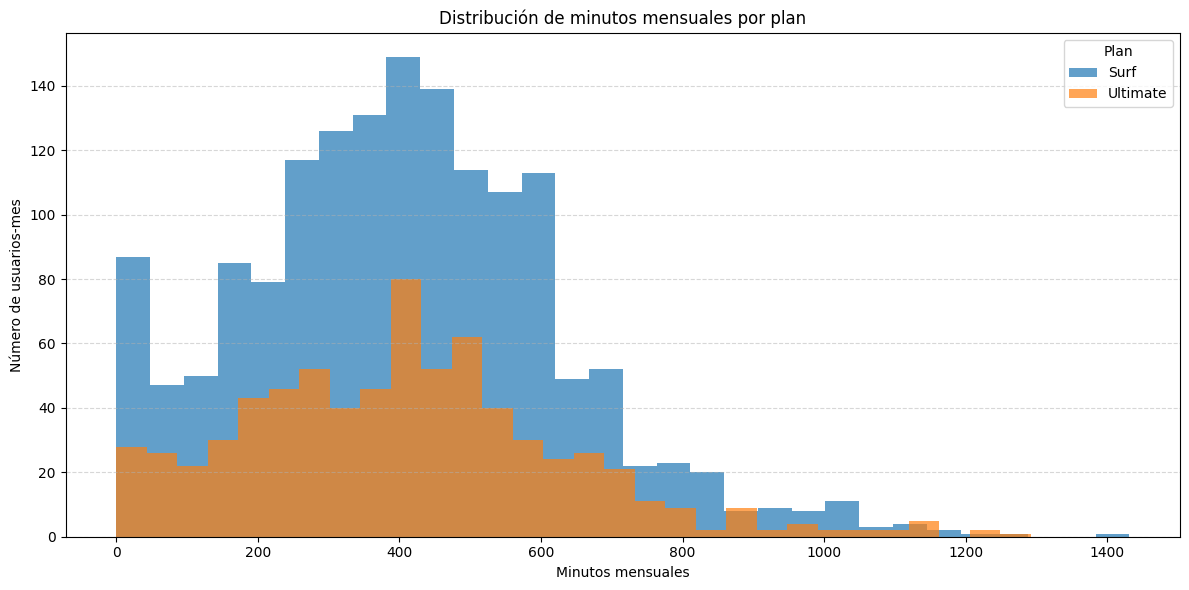

In [164]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf = df_total[df_total['plan'] == 'surf']
df_ultimate = df_total[df_total['plan'] == 'ultimate']
#Datos para elaborar el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_surf['total_minutos_mes'], bins=30, alpha=0.7, label='Surf', color='#1f77b4')
plt.hist(df_ultimate['total_minutos_mes'], bins=30, alpha=0.7, label='Ultimate', color='#ff7f0e')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Número de usuarios-mes')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [165]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_minutos = df_total['total_minutos_mes'].mean()
varianza_minutos = df_total['total_minutos_mes'].var()
print(f"Media de minutos mensuales: {media_minutos:.2f}")
print(f"Varianza de minutos mensuales: {varianza_minutos:.2f}")

Media de minutos mensuales: 405.61
Varianza de minutos mensuales: 49752.16


<Figure size 1000x600 with 0 Axes>

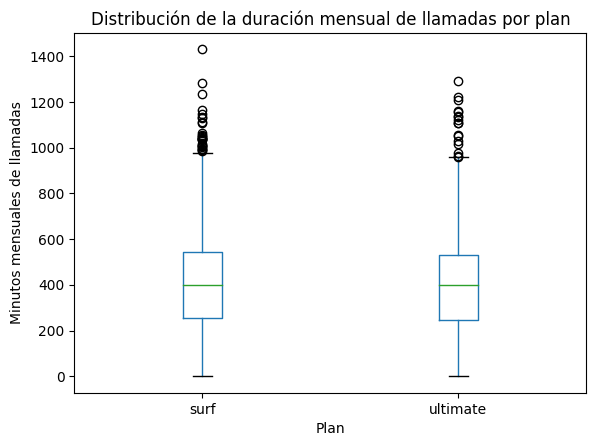

In [166]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_minutos_mes', by='plan', grid=False)
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Minutos mensuales de llamadas')
plt.show()

De acuerdo a la visualizacion de la informacion observamos que la media esta alrededor de 406 minutos y que los datos son muy dispersos en los usuarios de acuerdo con el resultado de la varianza 49752.16, podriamos decir que para el plan surf es para clientes que no llaman tanto y al contrario el plan ulimate es para clientes que llaman demasiado. Tambien se podria concluir que hay usuarios que estan pagando por minutos que no usan y hay otros que usan mas del doble del promedio.

### Mensajes

<Figure size 1000x600 with 0 Axes>

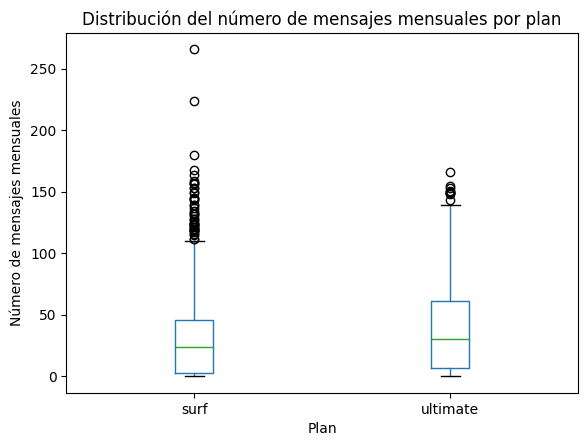

In [167]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_mensajes_mes', by='plan', grid=False)
plt.title('Distribución del número de mensajes mensuales por plan')
plt.suptitle('')  
plt.xlabel('Plan')
plt.ylabel('Número de mensajes mensuales')
plt.show()

In [168]:
# Calcula la media y la varianza de la número de mensajes que tienden a enviar cada mes.
media_mensajes = df_total['total_mensajes_mes'].mean()
varianza_mensajes = df_total['total_mensajes_mes'].var()
print(f"Media de mensajes mensuales: {media_mensajes:.2f}")
print(f"Varianza de mensajes mensuales: {varianza_mensajes:.2f}")

Media de mensajes mensuales: 32.90
Varianza de mensajes mensuales: 1127.85


Podemos concluir que igual que se presenta en el consumo de minutos en los planes, los usuarios estan muy dispersos en el comportamiento, algunos usuarios no envian mensajes, otros envian entre 70 o mas mensajes al mes y que el plan surf de 50 mensajes es casi suficiente para la mayoria de usuarios y el plan ultimate de 1000 son demasiados y lo usan muy pocos a ese nivel.

### Internet

<Figure size 1000x600 with 0 Axes>

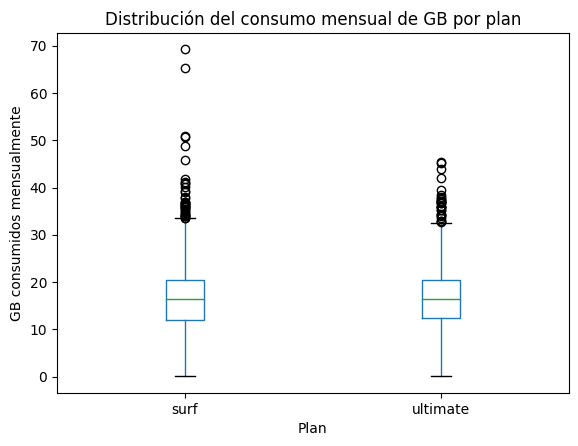

In [169]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
df_total.boxplot(column='total_gb_mes', by='plan', grid=False)
plt.title('Distribución del consumo mensual de GB por plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('GB consumidos mensualmente')
plt.show()

In [170]:
# Calcula la media y la varianza de los gb que usan cada mes.
media_gb = df_total['total_gb_mes'].mean()
varianza_gb = df_total['total_gb_mes'].var()
print(f"Media de datos mensuales: {media_gb:.2f}")
print(f"Varianza de datos mensuales: {varianza_gb:.2f}")

Media de datos mensuales: 16.49
Varianza de datos mensuales: 59.07


Como conclusion es que los usuarios consumen en promedio 16 gigas para los planes surf estaria por encima de la gigas que incluye el plan y estarian pagando cargos extras por ese consumo adicional y para el plan ultimate esta por debajo de lo que ofrece el plan por lo tanto no estarian pagando cargos extras. 

## Ingreso

In [171]:
df_total['total_costo'].describe().round(2)

count    2277.00
mean      192.87
std        38.82
min       166.50
25%       166.50
50%       166.50
75%       250.00
max       250.00
Name: total_costo, dtype: float64

La mayoria de los usuarios pagan las tarifas fijas, la mediana se encuentra en 166,50 que corresponde el plan surf sin tener excedentes y que solo un 25% de usuarios paga 250 que es el plan ultimate. El ingreso promedio se ubica en 192.87 lo que establece que los clientes permanecen el plan economico y que una parte pequeña de usuario paga el plan mas alto. La desviacion estandar 38,82 indica que hay grupos diferenciados.   

## Prueba las hipótesis estadísticas

In [172]:
# Prueba las hipótesis
from scipy.stats import ttest_ind
surf_ingresos = df_total[df_total['plan'] == 'surf']['total_costo']
ultimate_ingresos = df_total[df_total['plan'] == 'ultimate']['total_costo']
alpha = 0.05
t_stat, p_value = ttest_ind(surf_ingresos, ultimate_ingresos, equal_var=False)
print('Estadístico t:', t_stat)
print('Valor p:', p_value)

Estadístico t: -inf
Valor p: 0.0


/tmp/ipykernel_32/3293423216.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(surf_ingresos, ultimate_ingresos, equal_var=False)


In [174]:
# Prueba las hipótesis usuarios del área NY-NJ es diferente al de los usuarios de otras regiones
df_total = df_total.merge(df_users[['user_id', 'estado']], on='user_id', how='left')
ny_nj_ingresos = df_total[df_total['estado'].isin(['NY', 'NJ'])]['total_costo']
otras_regiones_ingresos = df_total[~df_total['estado'].isin(['NY', 'NJ'])]['total_costo']
t_stat, p_value = ttest_ind(ny_nj_ingresos, otras_regiones_ingresos, equal_var=False)
print('Estadístico t:', round(t_stat, 2))
print('Valor p:', round(p_value, 4))
alpha = 0.05
if p_value < alpha:
    print('Rechazamos H₀: hay diferencia significativa entre los ingresos promedio de NY-NJ y otras regiones.')
else:
    print('No se puede rechazar H₀: no hay evidencia de diferencia entre los ingresos promedio.')

Estadístico t: -9.04
Valor p: 0.0
Rechazamos H₀: hay diferencia significativa entre los ingresos promedio de NY-NJ y otras regiones.


## Conclusión general

In [ ]:
1. Es importante inicial el analisis de la informacion con el contenido de los datos, asi mismo evidenciar si hay valores ausentes o duplicados que requieran de ajuste o eliminacion para que no distorsione los resultados de los calculos estimados.
2. Como no fue posible determinar como esta distribuido el costo de los paquetes de los planes si fue posible identificar los sobrecostos que los usuarios podrian estar asumiendo por desborde del plan.
3. Pudimos evidenciar que el comportamiento de los usuarios es disperso pero de igual manera pocos sobrepasan sus planes.
4. La mayoria de los usuarios se ubican en el plan economico por lo que cumple con las necesidades que requieren y asi mismo el porcentaje de usuarios que usan el plan plus es por que su labor asi lo requiere.
5. El operador Megaline puede invertir en publicidad al plan Surf que es el que genera mas ingresos por lo que la mayoria de usuarios tienen dicho plan.
6. El operador puede tambien estimar aumentar los datos o minutos por plan ya que son los recursos que mas usan los clientes. Los mensajes actualmente no son de mayor uso y se evidencio en el analisis realizado.    